In [3]:
import cv2
import numpy as np
from skimage import io, img_as_float
from skimage.filters import gaussian
from matplotlib import pyplot as plt


In [12]:
# Function to show an image using pyplot
def show_img(img, size=12):
  fig = plt.gcf()
  fig.set_size_inches(size, size)
  plt.axis("off")
  # plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.imshow(img)
  plt.show()

In [28]:
# Function to show an image using pyplot
def show_img_col(img, size=12):
  fig = plt.gcf()
  fig.set_size_inches(size, size)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.show()

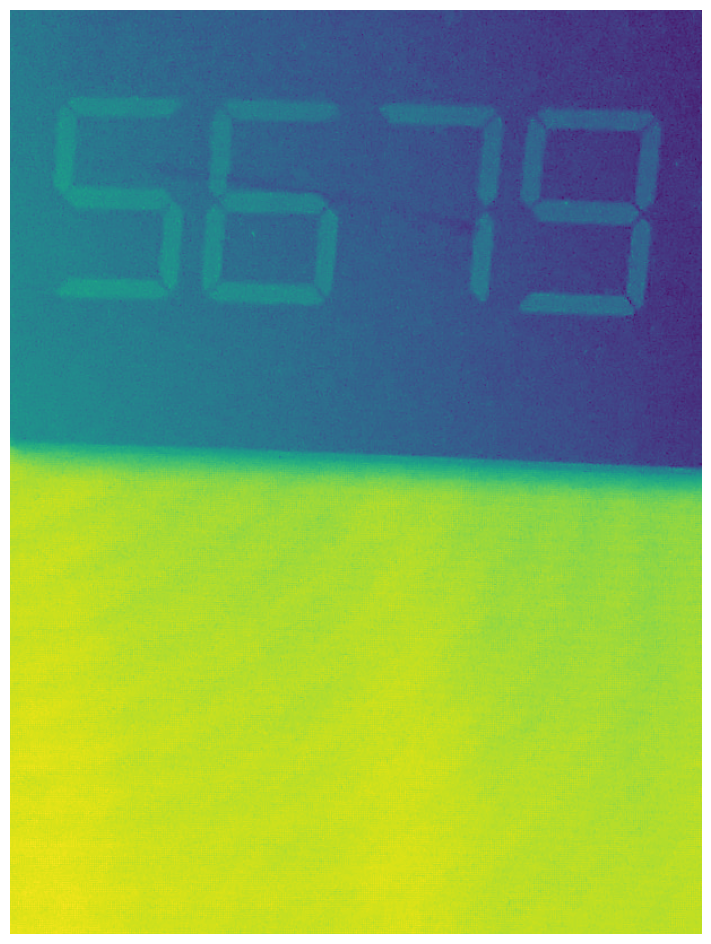

In [24]:
# img_gaussian_noise = img_as_float(io.imread('images/BSE_25sigma_noisy.jpg', as_gray=True))
# img_salt_pepper_noise = img_as_float(io.imread('images/BSE_salt_pepper.jpg', as_gray=True))

# img_nimbus = img_as_float(io.imread('images/mmasktest.jpg', as_gray=True))
# img_nimbus = img_as_float(io.imread('images/22319_20220321115131.jpg', as_gray=True))
img_nimbus = img_as_float(io.imread('images/22430_20220322115422.jpg', as_gray=True))

img = img_nimbus

show_img(img)


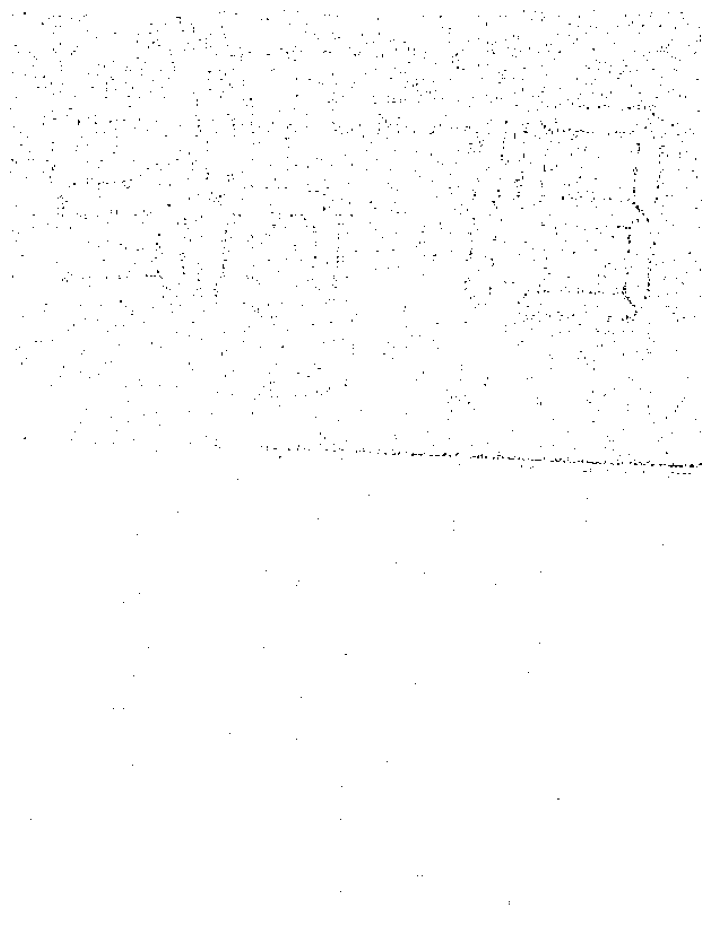

In [34]:
img_ag = cv2.imread('images/22430_20220322115422.jpg')
gray = cv2.cvtColor(img_ag, cv2.COLOR_BGR2GRAY)
adaptive_gaussian = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 9)

show_img_col(adaptive_gaussian)

In [25]:
gaussian_kernel = np.array([[1/16, 1/8, 1/16],   #3x3 kernel
                [1/8, 1/4, 1/8],
                [1/16, 1/8, 1/16]])

conv_using_cv2 = cv2.filter2D(img, -1, gaussian_kernel, borderType=cv2.BORDER_CONSTANT) 
# when ddepth=-1, the output image will have the same depth as the source
#example, if input is float64 then output will also be float64
# BORDER_CONSTANT - Pad the image with a constant value (i.e. black or 0)
#BORDER_REPLICATE: The row or column at the very edge of the original is replicated to the extra border.

gaussian_using_cv2 = cv2.GaussianBlur(img, (3,3), 0, borderType=cv2.BORDER_CONSTANT)

gaussian_using_skimage = gaussian(img, sigma=1, mode='constant', cval=0.0)
#sigma defines the std dev of the gaussian kernel. SLightly different than 
#how we define in cv2


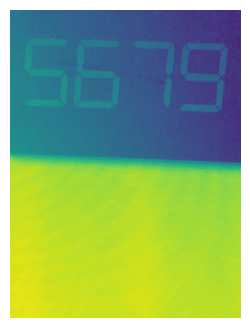

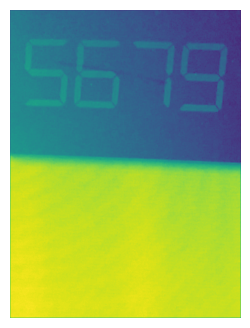

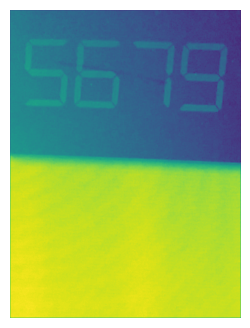

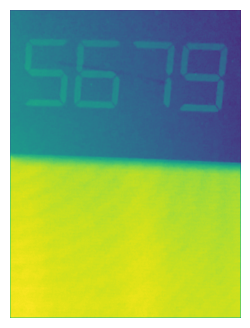

In [26]:
show_img(img,4)
show_img(conv_using_cv2,4)
show_img(gaussian_using_cv2,4)
show_img(gaussian_using_skimage,4)
#cv2.imshow("Using scipy2", conv_using_scipy2)



In [10]:
cv2.imshow("Original", img)
cv2.waitKey(0)          
cv2.destroyAllWindows() 


error: OpenCV(4.2.0) C:\projects\opencv-python\opencv\modules\highgui\src\window.cpp:651: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'


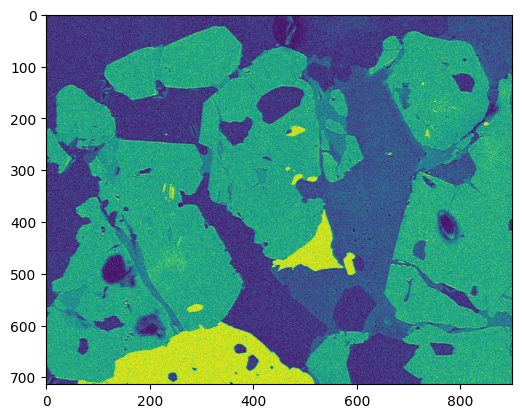

In [11]:
plt.imshow(img)